<a href="https://colab.research.google.com/github/mehadishakil/DIP-Lab-Final-2024/blob/main/DIP_Lab_Final_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range.

In [50]:
# image dimension
import cv2
image = cv2.imread('/content/drive/MyDrive/Assignment/DIP_Lab_task_01.png')

dimensions = image.shape

height, width, channels = dimensions
print(f'Height: {height}, Width: {width}, Channels: {channels}')

Height: 225, Width: 225, Channels: 3


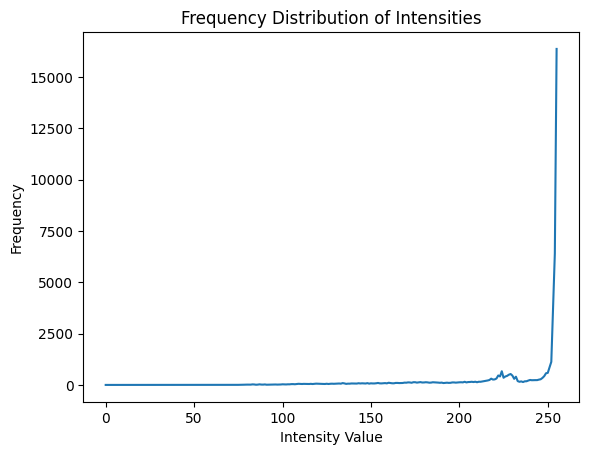

In [51]:
# frequency distribution of intensities
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment/DIP_Lab_task_01.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(hist)
plt.title('Frequency Distribution of Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [52]:
# range
import numpy as np

min_val = np.min(image)
max_val = np.max(image)
print(f'Range of Intensities: {min_val} to {max_val}')

Range of Intensities: 5 to 255


##2. Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).

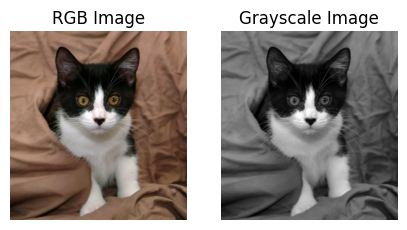

In [53]:
# rgb to gray_scale conversion
image = cv2.imread('/content/drive/MyDrive/Assignment/DIP_Lab_task_02.jpg')

height, width, channels = image.shape
gray_image = np.zeros((height, width), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        R, G, B = image[i, j]
        gray_value = int(0.299 * R + 0.587 * G + 0.114 * B)
        gray_image[i, j] = gray_value

cv2.imwrite('manual_gray_DIP_Lab_task_02.jpg', gray_image)
fig, ax = plt.subplots(1, 2, figsize=(5, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('RGB Image')
ax[0].axis('off')
ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()

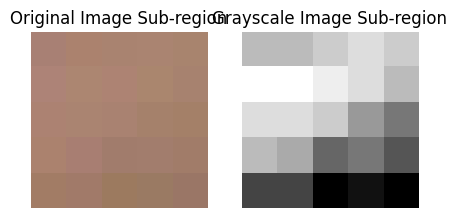

Intensity values of the 5x5 sub-region in the grayscale image:
[[128 128 129 130 129]
 [132 132 131 130 128]
 [130 130 129 126 124]
 [128 127 123 124 122]
 [121 121 117 118 117]]


In [54]:
# sub-region comparison
x, y = 20, 20

sub_region_original = image[y:y+5, x:x+5]
sub_region_gray = gray_image[y:y+5, x:x+5]

fig, ax = plt.subplots(1, 2, figsize=(5, 5))

ax[0].imshow(cv2.cvtColor(sub_region_original, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image Sub-region')
ax[0].axis('off')
ax[1].imshow(sub_region_gray, cmap='gray')
ax[1].set_title('Grayscale Image Sub-region')
ax[1].axis('off')

plt.show()

print("Intensity values of the 5x5 sub-region in the grayscale image:")
print(sub_region_gray)

##3. Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing.

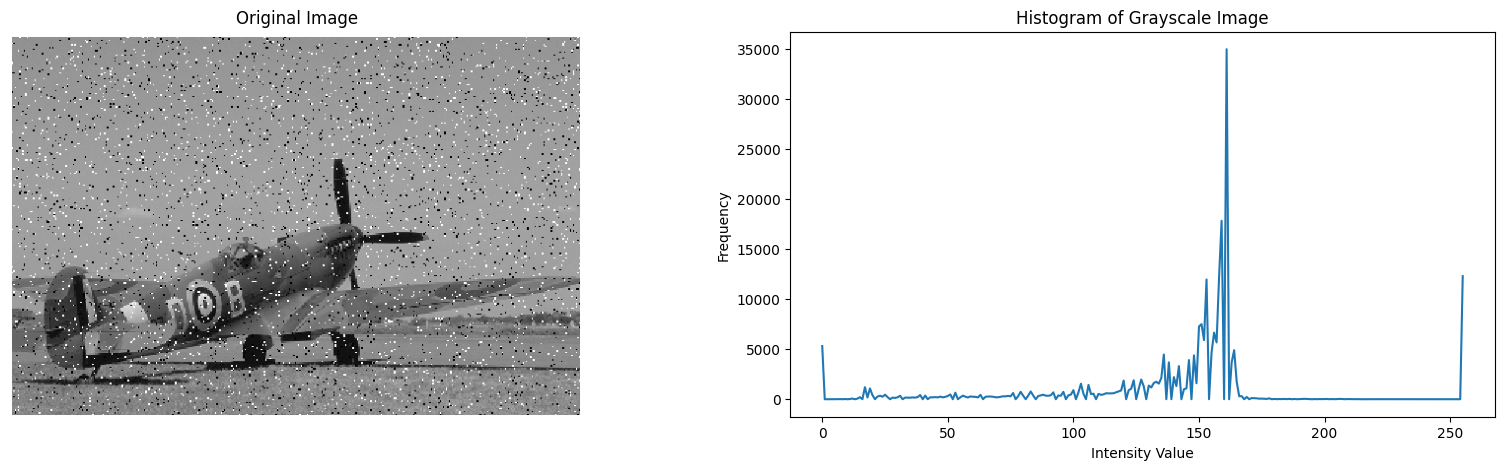

In [55]:
# identify the noise
image = cv2.imread('/content/drive/MyDrive/Assignment/DIP_Lab_task_03.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram of Grayscale Image')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

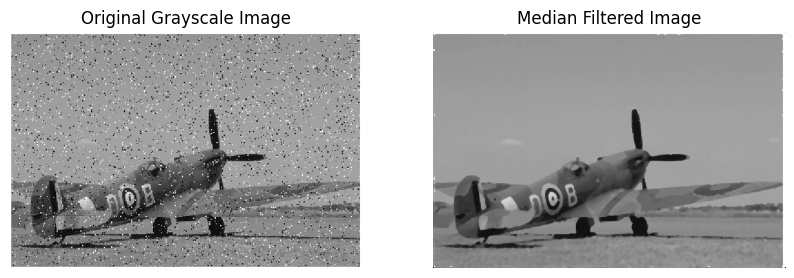

In [56]:
# median filter for smoothing with a 5x5 kernel size
def apply_median_filter(image, kernel_size):
    padded_image = np.pad(image, (kernel_size // 2,), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    height, width = image.shape

    for i in range(height):
        for j in range(width):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            median_value = np.median(neighbors)
            filtered_image[i, j] = median_value

    return filtered_image

median_filtered_image = apply_median_filter(gray_image, 5)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')
ax[1].imshow(median_filtered_image, cmap='gray')
ax[1].set_title('Median Filtered Image')
ax[1].axis('off')
plt.show()

##4. Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively.

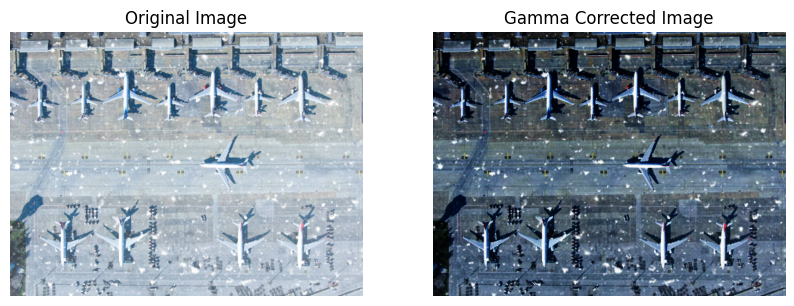

In [57]:
image = cv2.imread('/content/drive/MyDrive/Assignment/DIP_Lab_task_04.jpg')

def gamma_correction(image, gamma):
    normalized_img = image / 255.0
    gamma_corrected_img = np.power(normalized_img, gamma)
    final_img = np.uint8(gamma_corrected_img * 255)
    return final_img

gamma_value = 3.5
gamma_corrected_image = gamma_correction(image, gamma_value)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Gamma Corrected Image')
ax[1].axis('off')
plt.show()